<a href="https://colab.research.google.com/github/abhy-kumar/microgrid/blob/main/MicroGridGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install numpy pandas matplotlib scikit-learn seaborn catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31507
[LightGBM] [Info] Number of data points in the train set: 6988, number of used features: 135
[LightGBM] [Info] Start training from score 194.732796
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31437
[LightGBM] [Info] Number of data points in the train set: 5590, number of used features: 135
[LightGBM] [Info] Start training from score 202.672798
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31460
[LightGBM] [Info] Number of data points in the train set: 5590, number of used features: 135
[LightGBM] [Info] St

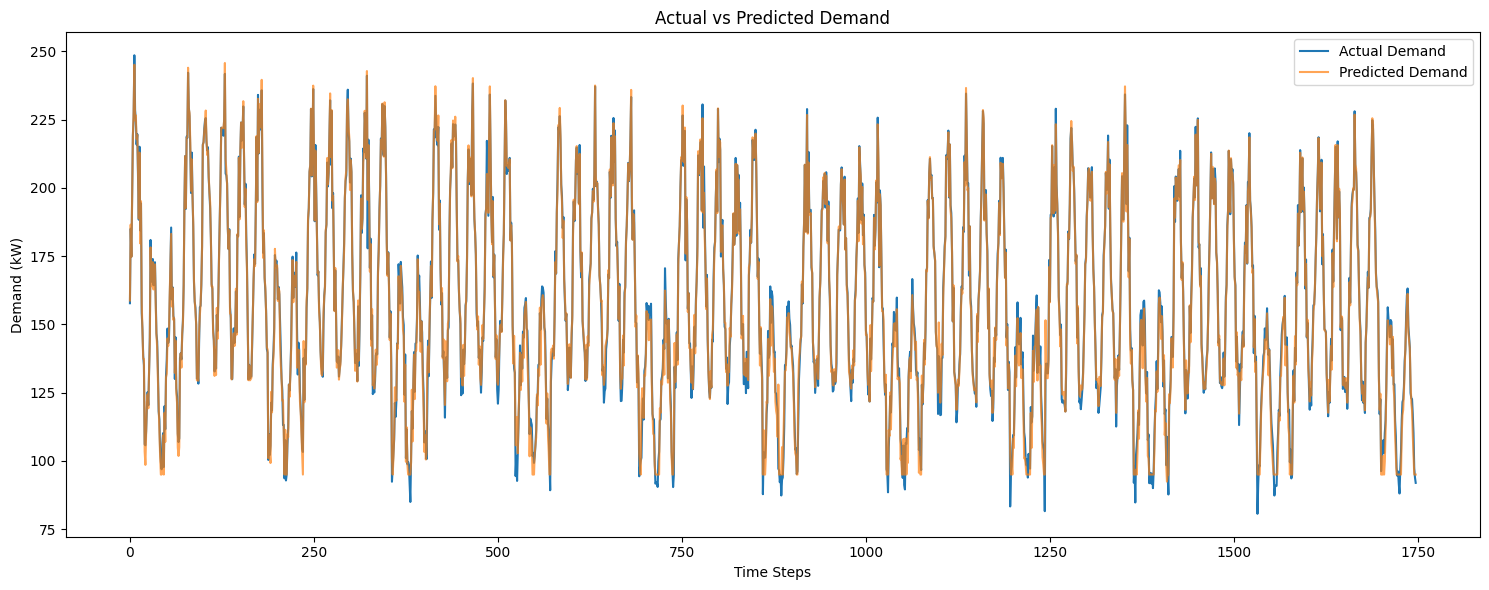


Advanced microgrid simulation completed successfully.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Advanced machine learning models
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

class AdvancedMicroGridSimulation:
    def __init__(self, days=365, random_state=16):
        """
        Advanced Micro-Grid Simulation with Enhanced Predictive Modeling

        Parameters:
        - days: Number of days to simulate
        - random_state: Seed for reproducibility
        """
        self.days = days
        self.random_state = random_state
        np.random.seed(random_state)

        # Enhanced generation and demand parameters
        self.generation_params = {
            'solar': {
                'capacity': 50,  # kW
                'efficiency_variance': 0.1,
                'seasonal_amplitude': 0.5
            },
            'wind': {
                'capacity': 75,  # kW
                'cut_in_speed': 3,
                'rated_speed': 12,
                'cut_out_speed': 25
            },
            'biogas': {
                'capacity': 30,  # kW
                'base_load_factor': 0.6,
                'maintenance_impact': 0.15
            }
        }

        # More sophisticated timestamps
        self.timestamps = pd.date_range(
            start='2023-01-01',
            periods=days*24,
            freq='h'
        )

    def _generate_advanced_solar_output(self):
        """
        Advanced solar generation model with more realistic variations
        """
        day_of_year = np.array([t.dayofyear for t in self.timestamps])
        hour_of_day = np.array([t.hour for t in self.timestamps])

        # Seasonal variation
        seasonal_factor = np.sin((day_of_year - 80) * (2 * np.pi / 365)) * \
            self.generation_params['solar']['seasonal_amplitude'] + 0.5

        # Hourly solar irradiance pattern
        hourly_factor = np.cos((hour_of_day - 12) * (np.pi / 12)) * 0.5 + 0.5

        # Weather and efficiency variations
        efficiency_noise = np.random.normal(
            0,
            self.generation_params['solar']['efficiency_variance'],
            len(self.timestamps)
        )

        solar_output = self.generation_params['solar']['capacity'] * \
            seasonal_factor * hourly_factor * (1 + efficiency_noise)

        return np.maximum(solar_output, 0)

    def _generate_advanced_wind_output(self):
        """
        Sophisticated wind power generation model
        """
        base_wind_speed = 10 + 5 * np.sin(
            np.linspace(0, 4*np.pi, len(self.timestamps))
        )
        wind_speed_variation = np.random.normal(
            0, 1.5,
            len(self.timestamps)
        )
        wind_speed = base_wind_speed + wind_speed_variation

        def wind_power_curve(speed):
            params = self.generation_params['wind']
            power = np.zeros_like(speed)

            # Interpolated power curve segments
            mask = (speed >= params['cut_in_speed']) & (speed < params['rated_speed'])
            power[mask] = params['capacity'] * (
                (speed[mask] - params['cut_in_speed']) /
                (params['rated_speed'] - params['cut_in_speed'])
            )

            # Rated power segment
            mask = (speed >= params['rated_speed']) & (speed < params['cut_out_speed'])
            power[mask] = params['capacity']

            return np.maximum(power, 0)

        return wind_power_curve(wind_speed)

    def _generate_advanced_biogas_output(self):
        """
        Enhanced biogas generation with more complex variations
        """
        params = self.generation_params['biogas']
        base_load = params['capacity'] * params['base_load_factor']

        # Random variations
        variation = np.random.normal(
            0, 0.075 * params['capacity'],
            len(self.timestamps)
        )

        # Simulated maintenance cycles
        maintenance_cycle = np.sin(
            np.linspace(0, 2*np.pi*self.days/7, len(self.timestamps))
        ) * params['maintenance_impact']

        biogas_output = base_load + variation + \
            maintenance_cycle * params['capacity']

        return np.maximum(biogas_output, 0)

    def _generate_advanced_demand(self):
        """
        Sophisticated electricity demand simulation
        """
        base_demand = 100
        day_of_year = np.array([t.dayofyear for t in self.timestamps])
        hour_of_day = np.array([t.hour for t in self.timestamps])
        weekday = np.array([t.weekday() for t in self.timestamps])

        # Seasonal demand variation
        seasonal_factor = np.sin(
            (day_of_year - 80) * (2 * np.pi / 365)
        ) * 0.2 + 1.1

        # Hourly demand patterns
        hourly_factor = np.sin(
            (hour_of_day - 6) * (np.pi / 12)
        ) * 0.4 + 1.6

        # Weekend vs. weekday demand
        weekend_factor = np.where(
            (weekday >= 5), 0.85, 1.15
        )

        # Complex noise model
        noise = np.random.normal(0, 0.05, len(self.timestamps))

        demand = base_demand * seasonal_factor * \
            hourly_factor * weekend_factor * (1 + noise)

        return np.maximum(demand, 0)

    def simulate_microgrid(self):
        """
        Comprehensive microgrid simulation with advanced feature engineering
        """
        # Generate power and demand
        solar_output = self._generate_advanced_solar_output()
        wind_output = self._generate_advanced_wind_output()
        biogas_output = self._generate_advanced_biogas_output()
        demand = self._generate_advanced_demand()

        # Create DataFrame with rich feature set
        df = pd.DataFrame({
            'Timestamp': self.timestamps,
            'Solar_Generation': solar_output,
            'Wind_Generation': wind_output,
            'Biogas_Generation': biogas_output,
            'Total_Generation': solar_output + wind_output + biogas_output,
            'Demand': demand
        })

        # Advanced feature engineering
        df['Hour'] = df['Timestamp'].dt.hour
        df['Day_of_Week'] = df['Timestamp'].dt.dayofweek
        df['Month'] = df['Timestamp'].dt.month
        df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)

        # Enhanced temporal features
        df['Lagged_Demand_1'] = df['Demand'].shift(1)
        df['Lagged_Demand_24'] = df['Demand'].shift(24)
        df['Demand_Change_Rate'] = df['Demand'].diff()

        # Rolling statistical features
        df['Rolling_Mean_6'] = df['Demand'].rolling(window=6).mean()
        df['Rolling_Std_6'] = df['Demand'].rolling(window=6).std()
        df['Rolling_Mean_24'] = df['Demand'].rolling(window=24).mean()

        # Generation-specific features
        df['Generation_Deviation'] = df['Total_Generation'] - df['Demand']
        df['Solar_Wind_Ratio'] = df['Solar_Generation'] / (df['Wind_Generation'] + 1e-5)

        df = df.dropna()
        return df

    def prepare_ml_pipeline(self, df):
        """
        Create an advanced machine learning pipeline
        """
        # Prepare features and target
        features = [
            'Solar_Generation', 'Wind_Generation', 'Biogas_Generation',
            'Hour', 'Day_of_Week', 'Month', 'Is_Weekend',
            'Lagged_Demand_1', 'Lagged_Demand_24',
            'Demand_Change_Rate',
            'Rolling_Mean_6', 'Rolling_Std_6',
            'Rolling_Mean_24',
            'Generation_Deviation', 'Solar_Wind_Ratio'
        ]

        X = df[features]
        y = df['Demand']

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.2,
            shuffle=False,
            random_state=self.random_state
        )

        # Preprocessing pipeline
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), features)
            ])

        # Advanced ensemble model with stacking
        base_models = [
            ('xgb', XGBRegressor(
                n_estimators=300,
                learning_rate=0.1,
                random_state=self.random_state
            )),
            ('lgbm', LGBMRegressor(
                n_estimators=300,
                learning_rate=0.1,
                random_state=self.random_state
            )),
            ('catboost', CatBoostRegressor(
                iterations=300,
                learning_rate=0.1,
                random_state=self.random_state,
                verbose=0
            ))
        ]

        stacking_regressor = StackingRegressor(
            estimators=base_models,
            final_estimator=XGBRegressor(
                n_estimators=100,
                learning_rate=0.1,
                random_state=self.random_state
            ),
            cv=5
        )

        # Full pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),
            ('regressor', stacking_regressor)
        ])

        # Train the pipeline
        pipeline.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = pipeline.predict(X_test)

        # Compute performance metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print("Model Performance Metrics:")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"R-squared Score: {r2:.4f}")

        # Cross-validation
        cv_scores = cross_val_score(
            pipeline,
            X,
            y,
            cv=5,
            scoring='neg_mean_squared_error'
        )
        print("\nCross-Validation Scores:")
        print(f"Mean CV MSE: {-cv_scores.mean():.4f}")
        print(f"Standard Deviation: {cv_scores.std():.4f}")

        # Visualization of predictions
        plt.figure(figsize=(15, 6))
        plt.plot(y_test.values, label='Actual Demand')
        plt.plot(y_pred, label='Predicted Demand', alpha=0.7)
        plt.title('Actual vs Predicted Demand')
        plt.xlabel('Time Steps')
        plt.ylabel('Demand (kW)')
        plt.legend()
        plt.tight_layout()
        plt.show()

        return pipeline

def main():
    # Instantiate the advanced simulation
    sim = AdvancedMicroGridSimulation(days=365, random_state=16)

    # Simulate microgrid data
    microgrid_data = sim.simulate_microgrid()

    # Train advanced predictive model
    model_pipeline = sim.prepare_ml_pipeline(microgrid_data)

    # Optional: Save simulation data
    microgrid_data.to_csv('advanced_microgrid_simulation.csv', index=False)

    print("\nAdvanced microgrid simulation completed successfully.")

if __name__ == "__main__":
    main()